In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 92s 1us/step


In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob('Datasets/train/*')
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

__________________________________________________________________________________________________
conv3_block1_2_bn (BatchNormali (None, 28, 28, 128)  512         conv3_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv3_block1_2_relu (Activation (None, 28, 28, 128)  0           conv3_block1_2_bn[0][0]          
__________________________________________________________________________________________________
conv3_block1_0_conv (Conv2D)    (None, 28, 28, 512)  131584      conv2_block3_out[0][0]           
__________________________________________________________________________________________________
conv3_block1_3_conv (Conv2D)    (None, 28, 28, 512)  66048       conv3_block1_2_relu[0][0]        
__________________________________________________________________________________________________
conv3_block1_0_bn (BatchNormali (None, 28, 28, 512)  2048        conv3_block1_0_conv[0][0]        
__________

__________________________________________________________________________________________________
conv4_block3_3_bn (BatchNormali (None, 14, 14, 1024) 4096        conv4_block3_3_conv[0][0]        
__________________________________________________________________________________________________
conv4_block3_add (Add)          (None, 14, 14, 1024) 0           conv4_block2_out[0][0]           
                                                                 conv4_block3_3_bn[0][0]          
__________________________________________________________________________________________________
conv4_block3_out (Activation)   (None, 14, 14, 1024) 0           conv4_block3_add[0][0]           
__________________________________________________________________________________________________
conv4_block4_1_conv (Conv2D)    (None, 14, 14, 256)  262400      conv4_block3_out[0][0]           
__________________________________________________________________________________________________
conv4_bloc

conv5_block2_out (Activation)   (None, 7, 7, 2048)   0           conv5_block2_add[0][0]           
__________________________________________________________________________________________________
conv5_block3_1_conv (Conv2D)    (None, 7, 7, 512)    1049088     conv5_block2_out[0][0]           
__________________________________________________________________________________________________
conv5_block3_1_bn (BatchNormali (None, 7, 7, 512)    2048        conv5_block3_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block3_1_relu (Activation (None, 7, 7, 512)    0           conv5_block3_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block3_2_conv (Conv2D)    (None, 7, 7, 512)    2359808     conv5_block3_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_bloc

In [7]:
# tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory('Datasets/train',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [10]:
test_set = test_datagen.flow_from_directory('Datasets/test',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [11]:
r = model.fit_generator(training_set,validation_data=test_set,epochs=100,steps_per_epoch=len(training_set),validation_steps=len(test_set))

C:\Users\naman solanki\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
2/2 [==============================] - 38s 24s/step - loss: 2.8405 - accuracy: 0.3542 - val_loss: 7.7137 - val_accuracy: 0.1552
Epoch 2/100
2/2 [==============================] - 20s 15s/step - loss: 5.6084 - accuracy: 0.3333 - val_loss: 3.3441 - val_accuracy: 0.5172
Epoch 3/100
2/2 [==============================] - 21s 14s/step - loss: 2.9226 - accuracy: 0.3958 - val_loss: 3.6504 - val_accuracy: 0.3276
Epoch 4/100
2/2 [==============================] - 20s 15s/step - loss: 2.5292 - accuracy: 0.3958 - val_loss: 2.4661 - val_accuracy: 0.3621
Epoch 5/100
2/2 [==============================] - 16s 13s/step - loss: 1.2536 - accuracy: 0.5521 - val_loss: 2.2112 - val_accuracy: 0.5345
Epoch 6/100
2/2 [==============================] - 19s 16s/step - loss: 2.2309 - accuracy: 0.5104 - val_loss: 1.9754 - val_accuracy: 0.5345
Epoch 7/100
2/2 [==============================] - 17s 14s/step - loss: 1.5907 - accuracy: 0.6250 - val_loss: 1.7529 - val_accuracy: 0.4310
Epoch 8/100
2/2 [===

2/2 [==============================] - 9s 7s/step - loss: 0.1537 - accuracy: 0.9583 - val_loss: 0.8810 - val_accuracy: 0.7414
Epoch 60/100
2/2 [==============================] - 9s 6s/step - loss: 0.1519 - accuracy: 0.9583 - val_loss: 0.9045 - val_accuracy: 0.6897
Epoch 61/100
2/2 [==============================] - 9s 7s/step - loss: 0.1573 - accuracy: 0.9896 - val_loss: 0.9062 - val_accuracy: 0.7241
Epoch 62/100
2/2 [==============================] - 9s 7s/step - loss: 0.1491 - accuracy: 0.9792 - val_loss: 0.8787 - val_accuracy: 0.7759
Epoch 63/100
2/2 [==============================] - 9s 7s/step - loss: 0.1424 - accuracy: 0.9688 - val_loss: 0.8711 - val_accuracy: 0.8103
Epoch 64/100
2/2 [==============================] - 9s 7s/step - loss: 0.1432 - accuracy: 0.9792 - val_loss: 0.9363 - val_accuracy: 0.6724
Epoch 65/100
2/2 [==============================] - 9s 6s/step - loss: 0.1426 - accuracy: 0.9688 - val_loss: 0.8785 - val_accuracy: 0.7586
Epoch 66/100
2/2 [======================

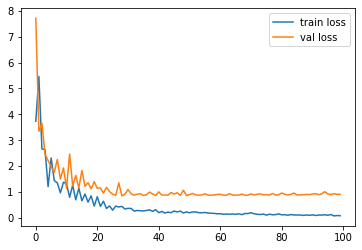

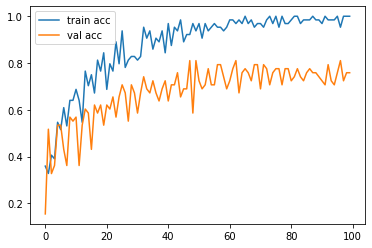

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [14]:
y_pred = model.predict(test_set)
y_pred

array([[6.32114112e-01, 3.18393409e-01, 4.94925007e-02],
       [8.98371160e-01, 8.49770159e-02, 1.66518427e-02],
       [1.97678287e-06, 1.46643521e-04, 9.99851346e-01],
       [6.05129242e-01, 1.89555421e-01, 2.05315396e-01],
       [7.62938405e-04, 9.97173548e-01, 2.06346135e-03],
       [4.79225636e-01, 2.50736326e-01, 2.70037979e-01],
       [1.47262690e-04, 9.90046084e-01, 9.80666839e-03],
       [3.68421786e-02, 5.92622200e-05, 9.63098586e-01],
       [1.18404359e-03, 6.31657720e-01, 3.67158204e-01],
       [3.02829072e-02, 7.82240629e-02, 8.91493022e-01],
       [2.57895552e-02, 5.50926384e-03, 9.68701124e-01],
       [5.87864488e-04, 9.98250425e-01, 1.16170826e-03],
       [9.88194227e-01, 6.92357169e-03, 4.88214288e-03],
       [2.75250641e-04, 8.81542921e-01, 1.18181869e-01],
       [2.51239333e-02, 4.46313351e-01, 5.28562665e-01],
       [1.01120528e-02, 6.72906816e-01, 3.16981107e-01],
       [3.83877717e-02, 8.67031440e-02, 8.74909043e-01],
       [1.18102564e-03, 1.25736

In [15]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1], dtype=int64)

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_resnet50.h5')

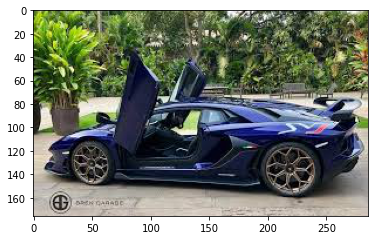

In [55]:
import matplotlib.image as mpimg
img = mpimg.imread('Datasets/Test/lamborghini/3.jpg')
imgplot = plt.imshow(img)
plt.show()

In [56]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [57]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [58]:
x.shape

(224, 224, 3)

In [59]:
x=x/255

In [60]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [61]:
img_data

array([[[[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.264496, -116.04567 , -122.91137 ],
         [-103.18214 , -115.96331 , -122.82902 ],
         [-103.08018 , -115.86135 , -122.72706 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.00959 , -115.818214, -122.719215],
         [-103.01743 , -115.82606 , -122.72706 ],
         [-103.021355, -115.82998 , -122.73098 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-102.96645 , -115.80253 , -122.73882 ],
         [-102.95861 , -115.794685, -122.73098 ],
         [-102.95861 , -115.794685, -122.73098 ]],

        ...,

        [[-103.04096 , -115.96723 , -1

In [62]:
model.predict(img_data)

array([[0.01408598, 0.03663984, 0.9492742 ]], dtype=float32)

In [63]:
a=np.argmax(model.predict(img_data), axis=1)

In [64]:
a

array([2], dtype=int64)